In [1]:
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from scipy.stats import linregress
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-10.859497139630875, 172.8086695269697),
 (-38.160059667988804, 175.4950084096928),
 (70.04334418567737, 175.61843994165787),
 (-77.8365533514768, 129.251093232629),
 (61.89780408374824, -169.04365810242643),
 (49.29762707821334, -88.9585254992156),
 (-41.41028102263742, 100.57149985960746),
 (-63.348429710926936, 169.68762959809754),
 (-16.771432062167307, -141.3880401113123),
 (-15.134657034399268, 60.54748204241707),
 (11.468976328833165, -121.41130231813479),
 (-65.68857259191464, 70.49252766069466),
 (63.127062050037864, 75.91139977735673),
 (-83.67281585981276, -145.17295321321265),
 (46.45535814882001, -23.446729292413153),
 (-10.913613388827343, -66.65774660102056),
 (-37.15720824853961, -173.65435333353005),
 (-15.453304217701472, -12.389096356148286),
 (24.601873260442687, 106.3464701696235),
 (-37.729300535802814, 114.63451860817457),
 (15.30654691958182, -40.66074160340406),
 (18.230571229147813, -118.5594088619248),
 (-44.731911167328704, 83.47206555878387),
 (10.9825479

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [5]:
#We will need to do the following:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc8faf333882de7d50c8a5a8f4705739


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sola
Processing Record 2 of Set 1 | otorohanga
Processing Record 3 of Set 1 | leningradskiy
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | thunder bay
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | grand gaube
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | noyabrsk
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | praia da vitoria
Processing Record 16 of Set 1 | riberalta
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | bose
Processing Record 20 of Set 1 | cayenne
Processing Record 21 of Set 1 | constitucion
Processing Record 22 of Set 1 | asosa
Processing Record 23 of

Processing Record 35 of Set 4 | kahului
Processing Record 36 of Set 4 | jagraon
Processing Record 37 of Set 4 | alamogordo
Processing Record 38 of Set 4 | mehamn
Processing Record 39 of Set 4 | cartagena
Processing Record 40 of Set 4 | lebu
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | yvetot
Processing Record 43 of Set 4 | nanjing
Processing Record 44 of Set 4 | katherine
Processing Record 45 of Set 4 | kiunga
Processing Record 46 of Set 4 | tuktoyaktuk
Processing Record 47 of Set 4 | poya
Processing Record 48 of Set 4 | san miguel
Processing Record 49 of Set 4 | san cristobal
Processing Record 50 of Set 4 | marfino
Processing Record 1 of Set 5 | margate
Processing Record 2 of Set 5 | georgetown
Processing Record 3 of Set 5 | lamu
Processing Record 4 of Set 5 | marcona
City not found. Skipping...
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | goderich
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | ardee
Processing

Processing Record 28 of Set 8 | gushi
Processing Record 29 of Set 8 | eureka
Processing Record 30 of Set 8 | tall kayf
Processing Record 31 of Set 8 | abadan
Processing Record 32 of Set 8 | shingu
Processing Record 33 of Set 8 | khani
Processing Record 34 of Set 8 | hirara
Processing Record 35 of Set 8 | zhezkazgan
Processing Record 36 of Set 8 | aras
Processing Record 37 of Set 8 | prince rupert
Processing Record 38 of Set 8 | usinsk
Processing Record 39 of Set 8 | berlevag
Processing Record 40 of Set 8 | aswan
Processing Record 41 of Set 8 | ambilobe
Processing Record 42 of Set 8 | paradwip
City not found. Skipping...
Processing Record 43 of Set 8 | mao
Processing Record 44 of Set 8 | thinadhoo
Processing Record 45 of Set 8 | batemans bay
Processing Record 46 of Set 8 | krasnyy chikoy
Processing Record 47 of Set 8 | never
Processing Record 48 of Set 8 | hakvik
City not found. Skipping...
Processing Record 49 of Set 8 | tiznit
Processing Record 50 of Set 8 | sobolevo
Processing Record

Processing Record 20 of Set 12 | lisakovsk
Processing Record 21 of Set 12 | tidore
City not found. Skipping...
Processing Record 22 of Set 12 | qingan
City not found. Skipping...
Processing Record 23 of Set 12 | buncrana
Processing Record 24 of Set 12 | coruripe
Processing Record 25 of Set 12 | bada
Processing Record 26 of Set 12 | jiuquan
Processing Record 27 of Set 12 | ketchikan
Processing Record 28 of Set 12 | general roca
Processing Record 29 of Set 12 | moerai
Processing Record 30 of Set 12 | ampanihy
Processing Record 31 of Set 12 | north platte
Processing Record 32 of Set 12 | dillon
Processing Record 33 of Set 12 | chokurdakh
Processing Record 34 of Set 12 | lesosibirsk
Processing Record 35 of Set 12 | presidencia roque saenz pena
Processing Record 36 of Set 12 | inongo
Processing Record 37 of Set 12 | muros
Processing Record 38 of Set 12 | wahiawa
Processing Record 39 of Set 12 | araguacu
Processing Record 40 of Set 12 | monrovia
Processing Record 41 of Set 12 | shestakovo
Pr

In [8]:
len(city_data)

566

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sola,-13.88,167.55,83.30,69,4,5.14,VU,2020-02-19 20:16:41
1,Otorohanga,-38.18,175.20,64.99,92,8,1.59,NZ,2020-02-19 20:16:41
2,Leningradskiy,69.38,178.42,-9.89,90,100,21.74,RU,2020-02-19 20:16:41
3,New Norfolk,-42.78,147.06,55.40,71,75,9.17,AU,2020-02-19 20:16:41
4,Lavrentiya,65.58,-171.00,-9.63,81,100,9.84,RU,2020-02-19 20:16:41
5,Thunder Bay,48.40,-89.32,12.00,45,20,12.75,CA,2020-02-19 20:16:16
6,Busselton,-33.65,115.33,66.00,44,0,17.38,AU,2020-02-19 20:16:42
7,Bluff,-46.60,168.33,55.00,91,87,3.00,NZ,2020-02-19 20:16:42
8,Atuona,-9.80,-139.03,81.50,79,100,18.77,PF,2020-02-19 20:16:42
9,Grand Gaube,-20.01,57.66,78.80,78,40,10.29,MU,2020-02-19 20:16:42


In [10]:
#reorder columns
new_order_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sola,VU,2020-02-19 20:16:41,-13.88,167.55,83.30,69,4,5.14
1,Otorohanga,NZ,2020-02-19 20:16:41,-38.18,175.20,64.99,92,8,1.59
2,Leningradskiy,RU,2020-02-19 20:16:41,69.38,178.42,-9.89,90,100,21.74
3,New Norfolk,AU,2020-02-19 20:16:41,-42.78,147.06,55.40,71,75,9.17
4,Lavrentiya,RU,2020-02-19 20:16:41,65.58,-171.00,-9.63,81,100,9.84
5,Thunder Bay,CA,2020-02-19 20:16:16,48.40,-89.32,12.00,45,20,12.75
6,Busselton,AU,2020-02-19 20:16:42,-33.65,115.33,66.00,44,0,17.38
7,Bluff,NZ,2020-02-19 20:16:42,-46.60,168.33,55.00,91,87,3.00
8,Atuona,PF,2020-02-19 20:16:42,-9.80,-139.03,81.50,79,100,18.77
9,Grand Gaube,MU,2020-02-19 20:16:42,-20.01,57.66,78.80,78,40,10.29


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/19/20'

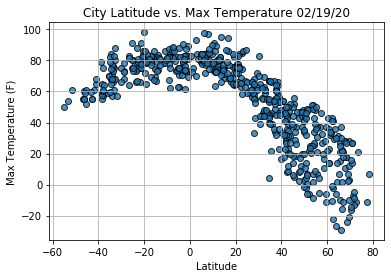

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

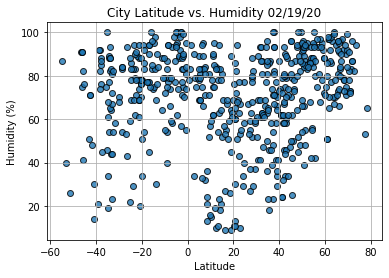

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

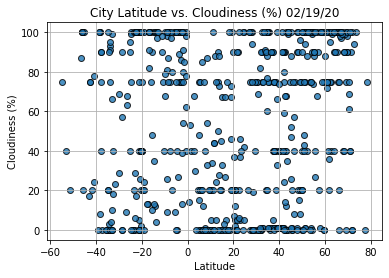

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

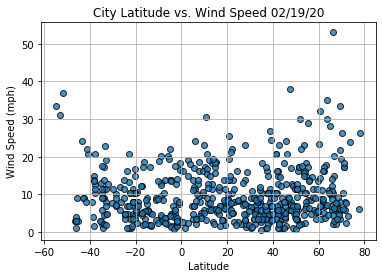

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [71]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print ("Correlation between two variables is equal " + str(r_value))
    plt.show()
    

In [72]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2020-02-19 20:16:43
Lat                        -46.19
Lng                        168.86
Max Temp                       55
Humidity                       91
Cloudiness                    100
Wind Speed                      3
Name: 13, dtype: object

In [73]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sola,VU,2020-02-19 20:16:41,-13.88,167.55,83.30,69,4,5.14
1,Otorohanga,NZ,2020-02-19 20:16:41,-38.18,175.20,64.99,92,8,1.59
3,New Norfolk,AU,2020-02-19 20:16:41,-42.78,147.06,55.40,71,75,9.17
6,Busselton,AU,2020-02-19 20:16:42,-33.65,115.33,66.00,44,0,17.38
7,Bluff,NZ,2020-02-19 20:16:42,-46.60,168.33,55.00,91,87,3.00
...,...,...,...,...,...,...,...,...,...
550,Alofi,NU,2020-02-19 20:18:29,-19.06,-169.92,78.80,83,24,6.93
554,Maldonado,UY,2020-02-19 20:18:30,-34.67,-54.92,78.80,61,20,11.41
556,Atyra,PY,2020-02-19 20:18:30,-25.25,-57.17,91.40,59,40,13.87
558,Richards Bay,ZA,2020-02-19 20:18:30,-28.78,32.04,78.66,84,0,8.97


Correlation between two variables is equal -0.8636794626894353


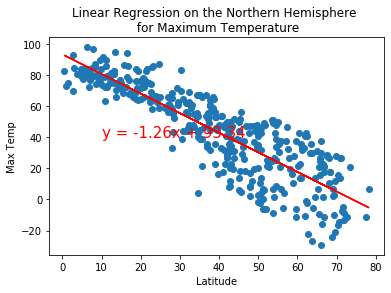

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

Correlation between two variables is equal 0.5881780566876754


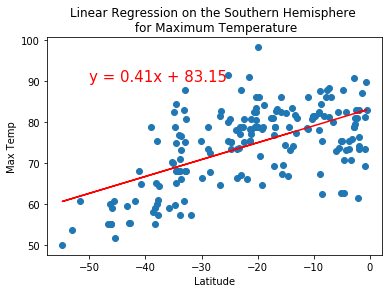

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

Correlation between two variables is equal 0.3580685535198103


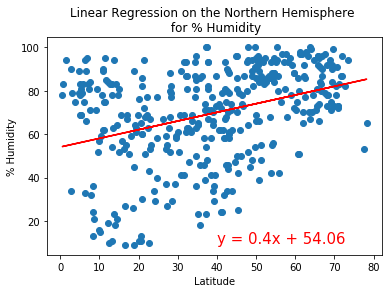

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

Correlation between two variables is equal 0.31272618696823423


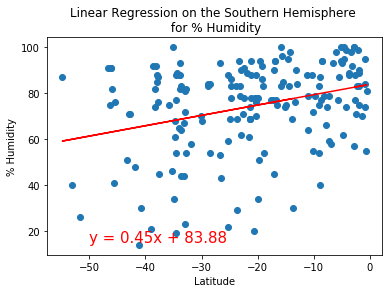

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

Correlation between two variables is equal 0.382575383428631


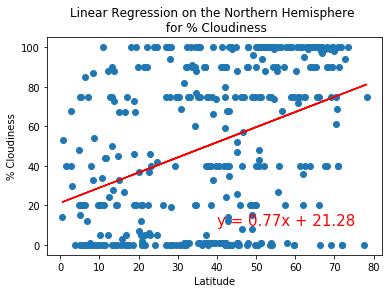

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

Correlation between two variables is equal 0.2184414183106499


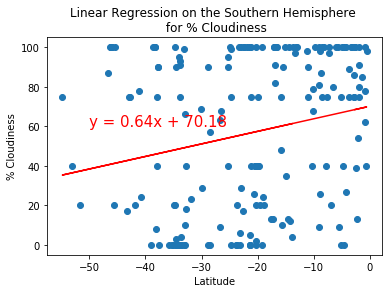

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

Correlation between two variables is equal 0.08062794569362594


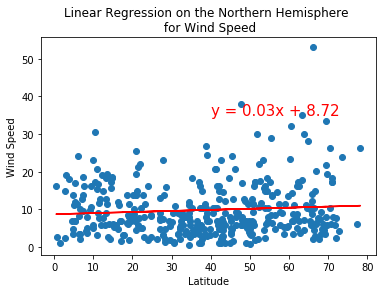

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

Correlation between two variables is equal -0.2334322736055941


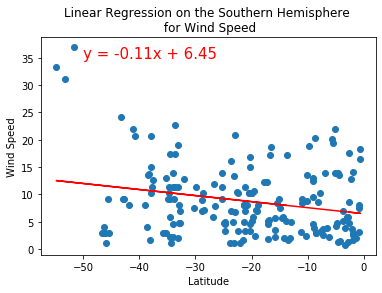

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))